In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import torch

np.set_printoptions(precision=4, suppress=True)

In [2]:
def softmax(x):
    # x has shape [batch_size, n_classes]
    e = np.exp(x)
    n = np.sum(e, 1, keepdims=True)
    return e/n

# Load data

In [3]:
dataset = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
docs = dataset['data']

docs = [(i, doc) for i, doc in enumerate(docs)]
decoder = np.load('decoder.npy')[()]
doc_decoder = np.load('doc_decoder.npy')[()]

# Load the trained model

In [4]:
state = torch.load('200_tmp_model_state.pytorch', map_location=lambda storage, loc: storage)
n_topics = 20

doc_vectors = state['doc_weights.weight'].cpu().clone().numpy()
topic_vectors = state['topics.topic_vectors'].cpu().clone().numpy()
resulted_word_vectors = state['neg.embedding.weight'].cpu().clone().numpy()
topic_dist = softmax(doc_vectors)

# Show a document and its topics

In [20]:
i = 16  # document id
print([doc for j, doc in docs if j == doc_decoder[i]][0], '\n')
s = ''
for j, p in enumerate(topic_dist[i]):
    s += '{0}:{1:.3f}  '.format(j, p)
    if j == 9:
        s += '\n'
print(s)

I don't have nor Imagine nor Real 3d, but as old
Amiga user I think you should take a look also to 
Real 3d 2.0 for the Amiga. I saw Imagine 2.0 on the
Amiga for a long time at my friend's home, and
I've seen R3D 2.0 in action at Bit.Movie 93 in Riccione,
Italy (an Italian Computer Graphics Contest).
Many professionals using 3d Studio on PC, SoftImage
for Silicon Graphics and Imagine on the Amiga were 
*VERY IMPRESSED* by the power of this programs.
Sorry, I've lost the posting with full description 
of features of this great program.

For more informations give a look in comp.sys.amiga.graphics.

Representative of Activa International told me that
it will be out in 2 weeks for the Amiga and that
PC MS-Windows, Silicon Indigo and Unix version are 
under development.

Ciao,
	Sergio



 

0:0.000  1:0.000  2:0.000  3:0.000  4:0.005  5:0.000  6:0.133  7:0.066  8:0.000  9:0.000  
10:0.000  11:0.000  12:0.000  13:0.000  14:0.000  15:0.000  16:0.795  17:0.000  18:0.000  19:0.000  


# Show topics

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
d = np.matmul(topic_dist, topic_vectors)

In [17]:
b = np.matmul(resulted_word_vectors, resulted_word_vectors.T)

In [7]:
similarity = np.matmul(d, resulted_word_vectors.T)
most = similarity.argsort(axis=1)[:, -25:]

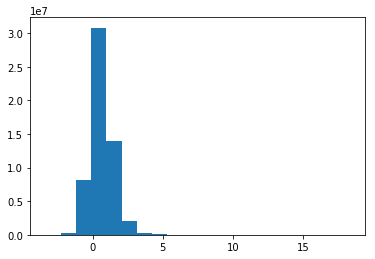

In [18]:
plt.hist(b.reshape(-1), bins=20);

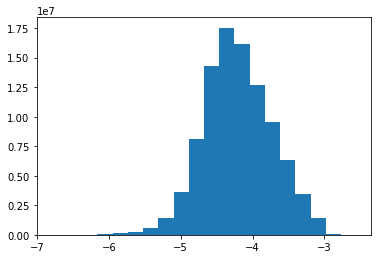

In [16]:
plt.hist(similarity.reshape(-1), bins=20);

In [ ]:
similarity = np.matmul(topic_vectors, resulted_word_vectors.T)
most = similarity.argsort(axis=1)[:, -25:]

In [8]:
for j in range(n_topics):
    topic_words = ' '.join([decoder[i] for i in reversed(most[j])])
    print('topic', j, ':', topic_words, '\n')

topic 0 : second example report little old far control hear make able real long sure end lot king ne place consider true note expect world mention low 

topic 1 : second report place far long sure allow source example leave great real little control idea able world hear old ne course small make space open 

topic 2 : source provide allow datum current level second space long subject example user tool entry receive ne window place senior general code software text national package 

topic 3 : place source example able second leave make long datum allow software real report old little lot world course sound expect live note design lead rate 

topic 4 : place long far second different able example idea make source great little note lot matter consider world expect sure allow old general space report course 

topic 5 : second source sure report place open real long great allow far note example test little idea able hear control ne make old world leave provide 

topic 6 : second leave place

In [ ]:
np.sort(similarity, 1)[:, -5:]

In [ ]:
np.sort(similarity, 1)[:, :5]